In [34]:
import pyspark
from pyspark.sql import SparkSession, Window
from pyspark.sql.functions import col, year, when, input_file_name, regexp_extract, unix_timestamp, row_number, count
from pyspark.sql import functions as F 
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Create or get an existing Spark session
spark = SparkSession.builder \
    .appName("EDA") \
    .getOrCreate()

# Extract Data

In [3]:
# Path to the folder containing the Parquet files
folder_path = "../sample_data/raw/"

# Read all Parquet files in the folder
df_yellow = spark.read.parquet(folder_path + 'yellow/yellow_tripdata_2024-*.parquet')

number_rows = df_yellow.count()
print('Number of rows: ' + str(number_rows))

Number of rows: 41169720


# Yellow Taxi EDA for Data Cleaning

## Negative/zero values

In [10]:
def find_negative_rows(df, column):
    number_rows = df.filter(col(column) < 0).count()
    print('Number of negative rows : ' + str(number_rows))
    
    if number_rows > 0:
        display(df.filter(col(column) < 0).limit(5).toPandas())

In [11]:
def find_zero_rows(df, column):
    number_rows = df.filter(col(column) == 0).count()
    print('Number of rows equals to zero: ' + str(number_rows))

    if number_rows > 0:
        display(df.filter(col(column) == 0).limit(5).toPandas())

In [12]:
def check_columns(df, columns):
    for column in columns:
        print ('Column: \033[1m' + column + '\033[0m\n')
        
        find_negative_rows(df, column)
        find_zero_rows(df, column)

In [13]:
columns_check = ['passenger_count', 'trip_distance', 'fare_amount' , 'total_amount']

check_columns(df_yellow, columns_check)

Column: passenger_count

Number of negative rows : 0
Number of rows equals to zero: 401354


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-10-01 00:00:47,2024-10-01 00:04:22,0,1.1,1,N,142,237,1,7.2,3.5,0.5,3.0,0.0,1.0,15.2,2.5,0.0
1,1,2024-10-01 00:07:10,2024-10-01 00:18:43,0,2.5,1,N,161,263,1,14.2,3.5,0.5,2.9,0.0,1.0,22.1,2.5,0.0
2,1,2024-10-01 00:43:46,2024-10-01 00:47:50,0,0.8,1,N,164,162,1,5.8,3.5,0.5,3.0,0.0,1.0,13.8,2.5,0.0
3,1,2024-10-01 00:53:09,2024-10-01 01:01:46,0,1.6,1,N,161,48,1,9.3,3.5,0.5,1.0,0.0,1.0,15.3,2.5,0.0
4,1,2024-10-01 00:39:12,2024-10-01 00:39:27,0,0.0,3,N,68,68,3,23.0,1.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0


Column: trip_distance

Number of negative rows : 0
Number of rows equals to zero: 776305


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-10-01 00:30:22,2024-10-01 00:30:39,1,0.0,1,N,262,262,3,3.0,3.5,0.5,0.0,0.0,1.0,8.00,2.5,0.00
1,1,2024-10-01 00:40:16,2024-10-01 00:40:42,1,0.0,1,N,83,83,2,3.0,1.0,0.5,0.0,0.0,1.0,5.50,0.0,0.00
2,2,2024-10-01 00:22:14,2024-10-01 00:22:19,1,0.0,1,N,132,132,2,3.0,1.0,0.5,0.0,0.0,1.0,7.25,0.0,1.75
3,2,2024-10-01 00:30:33,2024-10-01 00:31:34,3,0.0,5,N,265,265,1,70.0,0.0,0.0,0.0,0.0,1.0,71.00,0.0,0.00
4,2,2024-10-01 00:35:51,2024-10-01 00:36:01,1,0.0,1,N,238,238,3,-3.0,-1.0,-0.5,2.0,0.0,-1.0,-6.00,-2.5,0.00


Column: fare_amount

Number of negative rows : 731024


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-10-01 00:18:38,2024-10-01 00:36:47,2,7.42,1,N,239,247,4,-33.1,-1.0,-0.5,0.0,0.0,-1.0,-38.1,-2.5,0.0
1,2,2024-10-01 00:43:38,2024-10-01 00:45:00,3,0.05,1,N,230,230,4,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-8.7,-2.5,0.0
2,2,2024-10-01 00:39:06,2024-10-01 00:55:16,1,7.42,1,N,236,231,3,-31.0,-1.0,-0.5,0.0,0.0,-1.0,-36.0,-2.5,0.0
3,2,2024-10-01 00:35:51,2024-10-01 00:36:01,1,0.00,1,N,238,238,3,-3.0,-1.0,-0.5,2.0,0.0,-1.0,-6.0,-2.5,0.0
4,2,2024-10-01 00:42:03,2024-10-01 00:45:53,1,0.73,1,N,163,48,4,-5.8,-1.0,-0.5,0.0,0.0,-1.0,-10.8,-2.5,0.0


Number of rows equals to zero: 17260


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-10-01 07:41:33,2024-10-01 07:41:43,1,0.0,99,N,135,135,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2024-10-01 08:11:48,2024-10-01 08:12:04,1,0.0,1,N,161,161,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2024-10-01 08:12:11,2024-10-01 08:12:27,1,0.0,1,N,161,161,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2024-10-01 09:58:38,2024-10-01 09:58:47,1,0.0,99,N,228,228,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2024-10-01 10:25:58,2024-10-01 10:41:41,1,0.0,1,N,89,91,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Column: total_amount

Number of negative rows : 609344


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-10-01 00:18:38,2024-10-01 00:36:47,2,7.42,1,N,239,247,4,-33.1,-1.0,-0.5,0.0,0.0,-1.0,-38.1,-2.5,0.0
1,2,2024-10-01 00:43:38,2024-10-01 00:45:00,3,0.05,1,N,230,230,4,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-8.7,-2.5,0.0
2,2,2024-10-01 00:39:06,2024-10-01 00:55:16,1,7.42,1,N,236,231,3,-31.0,-1.0,-0.5,0.0,0.0,-1.0,-36.0,-2.5,0.0
3,2,2024-10-01 00:35:51,2024-10-01 00:36:01,1,0.00,1,N,238,238,3,-3.0,-1.0,-0.5,2.0,0.0,-1.0,-6.0,-2.5,0.0
4,2,2024-10-01 00:42:03,2024-10-01 00:45:53,1,0.73,1,N,163,48,4,-5.8,-1.0,-0.5,0.0,0.0,-1.0,-10.8,-2.5,0.0


Number of rows equals to zero: 5062


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-10-01 07:41:33,2024-10-01 07:41:43,1,0.0,99,N,135,135,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2024-10-01 08:11:48,2024-10-01 08:12:04,1,0.0,1,N,161,161,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2024-10-01 08:12:11,2024-10-01 08:12:27,1,0.0,1,N,161,161,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2024-10-01 09:58:38,2024-10-01 09:58:47,1,0.0,99,N,228,228,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2024-10-01 10:25:58,2024-10-01 10:41:41,1,0.0,1,N,89,91,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Conclusions**
1) There's no trip with negative passanger_count, trip_distance. But there're several trips with zero passangers or distance. We'll consider that as a data quality issue, replacing zero with 1 in case of passangers. For trip distance we'll leave as is.
2) There're cases where fare_amount or total_amount is negative. Lets take a further look to see if that's a reserval of a trip
3) There're cases where fare_amount or total_amount is zero. Lets check if there're cases where the trip distance is not zero and amount is

In [27]:
# example of negative fare_amount
df_yellow.filter(
    (col('VendorID') == 2) & 
    (col('tpep_pickup_datetime') == '2024-10-01 00:18:38') & 
    (col('tpep_dropoff_datetime') == '2024-10-01 00:36:47') & 
    (col('PULocationID') == 239) & 
    (col('DOLocationID') == 247) & 
    (col('trip_distance') == 7.42)
).show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2024-10-01 00:18:38|  2024-10-01 00:36:47|              2|         7.42|         1|                 N|         239|         247|           4|      -33.1| -1.0|   -0.5|       0.

If we look carefully at the above that, we can see that the timestamps and attributes are the same, and the amounts are exactly the opposite. We'll consider that this is a refund/reversal due to a incorrect charge, and will remove both from the data

In [36]:
# example of zero total_amount
df_yellow.filter(
    (col('total_amount') == 0) & 
    (col('trip_distance') != 0) &
    (col('payment_type') != 4) & (col('payment_type') != 3) #dispute and no charge payment types
).show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2024-10-05 04:36:01|  2024-10-05 04:36:23|              1|         0.07|         1|                 N|         223|         223|           2|        0.0|  0.0|    0.0|       0.

We do see some trips where there's distance, but no amount. We'll consider that as a logging error, but won't remove it, since we don't want to miss metrics like trips count, milage, etc. We will remove trips where both distance and amount is zero

## Duplicated data

In [14]:
# check if there's any duplicated data based on some key columns
key_cols = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']

df_duplicates = df_yellow.groupBy(key_cols).count().filter(col("count") > 1)

df_duplicates.show(5, truncate=False)

+--------+--------------------+---------------------+-------------+-----------+------------+------------+-----+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|trip_distance|fare_amount|PULocationID|DOLocationID|count|
+--------+--------------------+---------------------+-------------+-----------+------------+------------+-----+
|2       |2024-05-03 00:48:35 |2024-05-03 00:56:22  |1.17         |0.0        |114         |148         |2    |
|2       |2024-05-24 00:16:29 |2024-05-24 00:27:56  |1.8          |0.0        |186         |162         |2    |
|2       |2024-10-10 15:34:07 |2024-10-10 15:34:19  |0.0          |0.0        |236         |236         |2    |
|2       |2024-05-13 14:21:59 |2024-05-13 14:30:18  |0.79         |0.0        |231         |209         |2    |
|2       |2024-05-26 16:59:57 |2024-05-26 17:17:07  |7.69         |0.0        |132         |93          |2    |
+--------+--------------------+---------------------+-------------+-----------+------------+------------

We do see some duplicated data. 
In one example, we're missing the tip_amount in one of the logs. So the approach here will be to get the one with the highest total_amount

## Null Data

In [17]:
df_yellow.select('passenger_count').filter(
    (col('passenger_count').isNull())
).distinct().show()

+---------------+
|passenger_count|
+---------------+
|           NULL|
+---------------+



In [16]:
df_yellow.select('RatecodeID').filter(
    (col('RatecodeID').isNull())
).distinct().show()

+----------+
|RatecodeID|
+----------+
|      NULL|
+----------+



1) There's no null rows for pickup or dropoff datetime. But it's good to make our pipeline reliable and handle possible errors. We'll replace the null datetimes with the first date and hour of that year-month  
2) There're null passenger_count. We'll replace that with 1.
3) If the fee or distance is null, we'll replace with zero
4) For enumerators like RatecodeID, we'll replace null with 99, because that's what the dictonary describes the code for unkown 

## Data correctness 

In [32]:
# viagens extremamente longas (especialmente com trip distance ou fare_amount pequeno)
# arrumar (zerar ou inputar) numeros absurdos de trip_distance, total_amount usando algum metodo estatistico
# da pra fazer uma analise de miles / min. Remover acima de um limite

In [40]:
# error in total amout
df_yellow.filter(
    (col('total_amount') == 0) & 
    (col('fare_amount') != 0) 
).show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       6| 2024-10-01 04:10:08|  2024-10-01 04:10:25|           NULL|         4.72|      NULL|              NULL|         232|          61|           0|        2.9|  0.0|    0.5|       0.

In [ ]:
# wrong year
df_yellow.select(
    year('tpep_pickup_datetime')
).distinct().show()

+--------------------------+
|year(tpep_pickup_datetime)|
+--------------------------+
|                      2009|
|                      2024|
|                      2008|
|                      2002|
|                      2025|
|                      2026|
|                      2023|
+--------------------------+



In [8]:
# creates trip duration column
df_yellow = df_yellow.withColumn('trip_duration_min', 
                                 (unix_timestamp('tpep_dropoff_datetime') - unix_timestamp('tpep_pickup_datetime'))/60)

# miles per minute
df_yellow = df_yellow.withColumn('miles_per_minute', col('trip_distance')/col('trip_duration_min'))

# fare amout per mile
df_yellow = df_yellow.withColumn('amount_per_mile', col('fare_amount')/col('trip_distance'))

# fare amout per minute
df_yellow = df_yellow.withColumn('amount_per_min', col('fare_amount')/col('trip_duration_min'))

In [30]:
# dropoff before pickup
df_yellow.filter(col('trip_duration_min') < 0).show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+-------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|  trip_duration_min|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+-------------------+
|       1| 2024-10-01 12:30:00|  2024-10-01 12:28:56|              1|          1.8|        99|                 N|         161| 

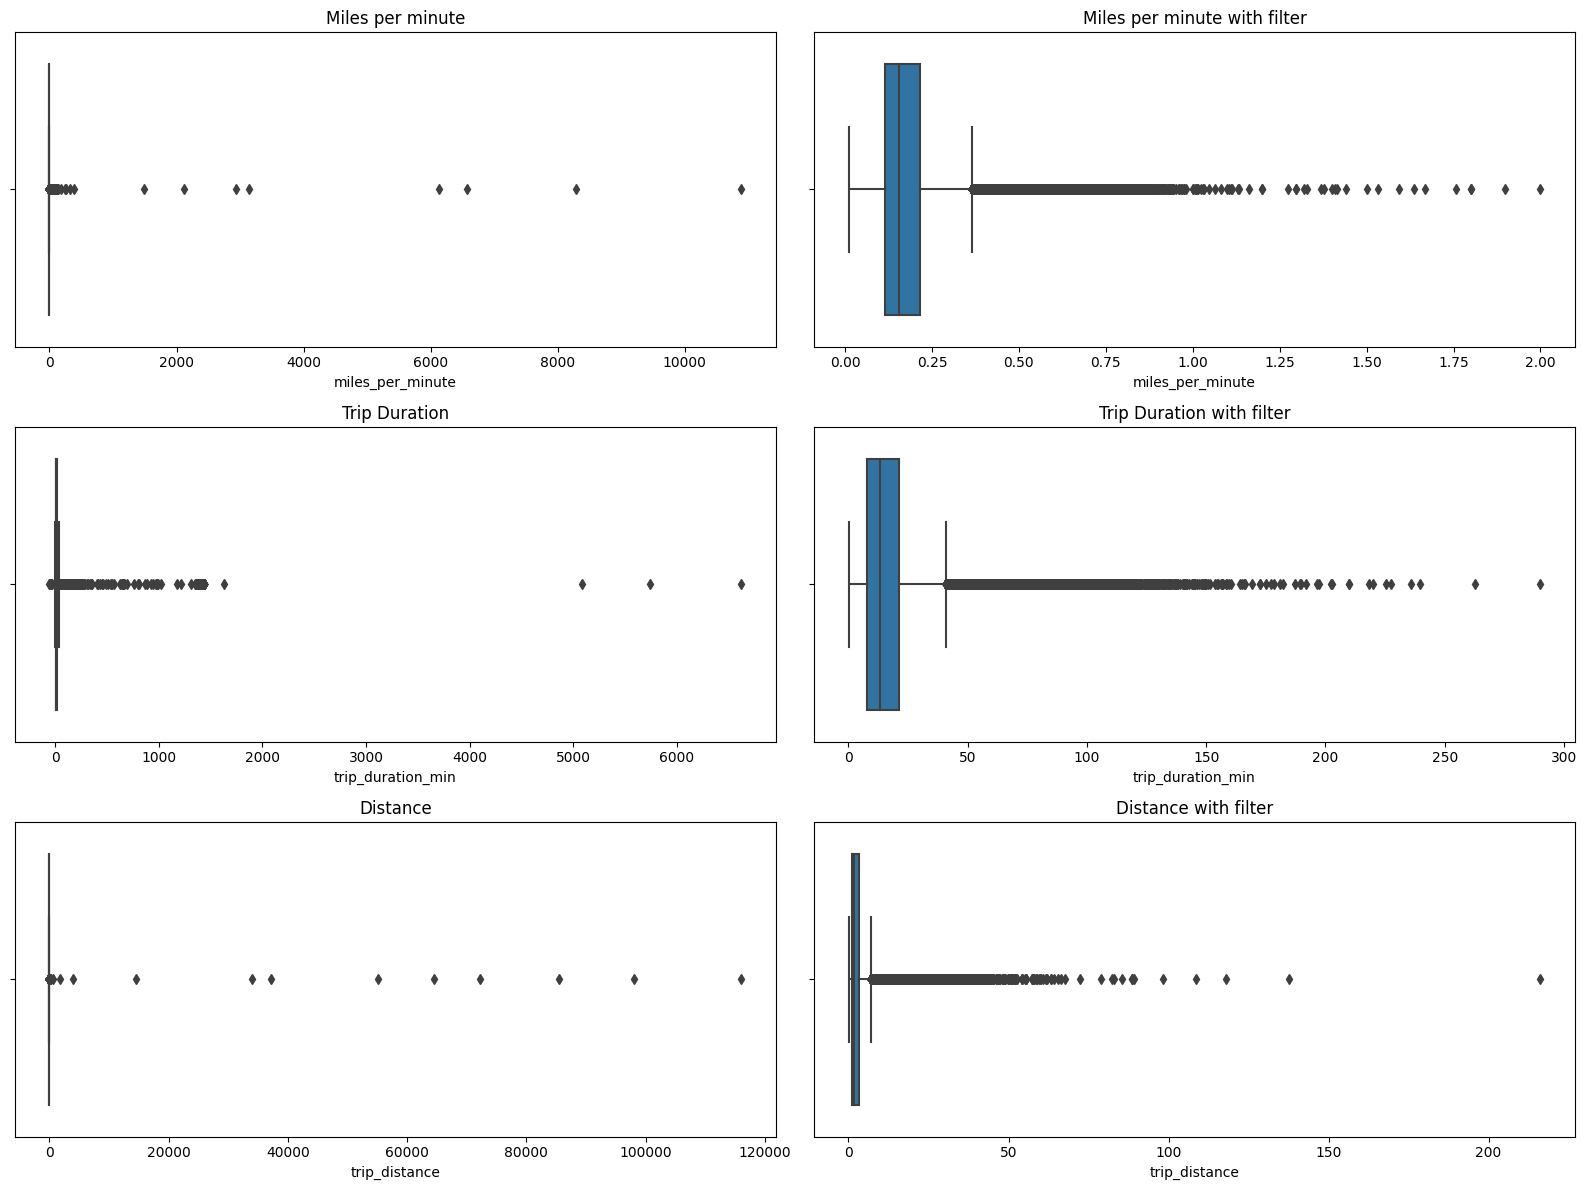

In [5]:
# time and distance outliers

miles_per_minute_pd = df_yellow.select('miles_per_minute','trip_duration_min', 'trip_distance').dropna().sample(False, 0.01).toPandas() #we need to sample the data since is too large

# first filter: removes based on miles per minute
df_yellow_filter = df_yellow.filter(
    (col('miles_per_minute') <= 2) &   #removes very fast trips
    (col('miles_per_minute') >= 0.01)  #removes very slow trips
)

#some rows are not filtered in the above. This removes large trips with short duration (excludes rows where more than 100 miles in less than 1 hour - not feasible within a city like nyc)   
df_yellow_filter = df_yellow_filter.filter(
    ~((col('trip_distance') > 100) & (col('trip_duration_min') < 60)) 
)

# removes short trips with large duration (less than 20 miles in more than 4 hours, etc.)
df_yellow_filter = df_yellow_filter.filter(
    ~((col('trip_distance') < 20) & (col('trip_duration_min') > 60*4)) &
    ~((col('trip_distance') < 50) & (col('trip_duration_min') > 60*8)) &
    ~((col('trip_distance') < 100) & (col('trip_duration_min') > 60*12))
)
                 
miles_per_minute_pd_th = df_yellow_filter.select('miles_per_minute','trip_duration_min', 'trip_distance').dropna().sample(False, 0.01).toPandas()

fig, ax = plt.subplots(3, 2, figsize=(16, 12))

sns.boxplot(x=miles_per_minute_pd['miles_per_minute'], ax = ax[0][0])
ax[0][0].set_title('Miles per minute')

sns.boxplot(x=miles_per_minute_pd_th['miles_per_minute'], ax = ax[0][1])
ax[0][1].set_title('Miles per minute with filter')

sns.boxplot(x=miles_per_minute_pd['trip_duration_min'], ax = ax[1][0])
ax[1][0].set_title('Trip Duration')

sns.boxplot(x=miles_per_minute_pd_th['trip_duration_min'], ax = ax[1][1])
ax[1][1].set_title('Trip Duration with filter')

sns.boxplot(x=miles_per_minute_pd['trip_distance'], ax = ax[2][0])
ax[2][0].set_title('Distance')

sns.boxplot(x=miles_per_minute_pd_th['trip_distance'], ax = ax[2][1])
ax[2][1].set_title('Distance with filter')

plt.tight_layout()
plt.show()

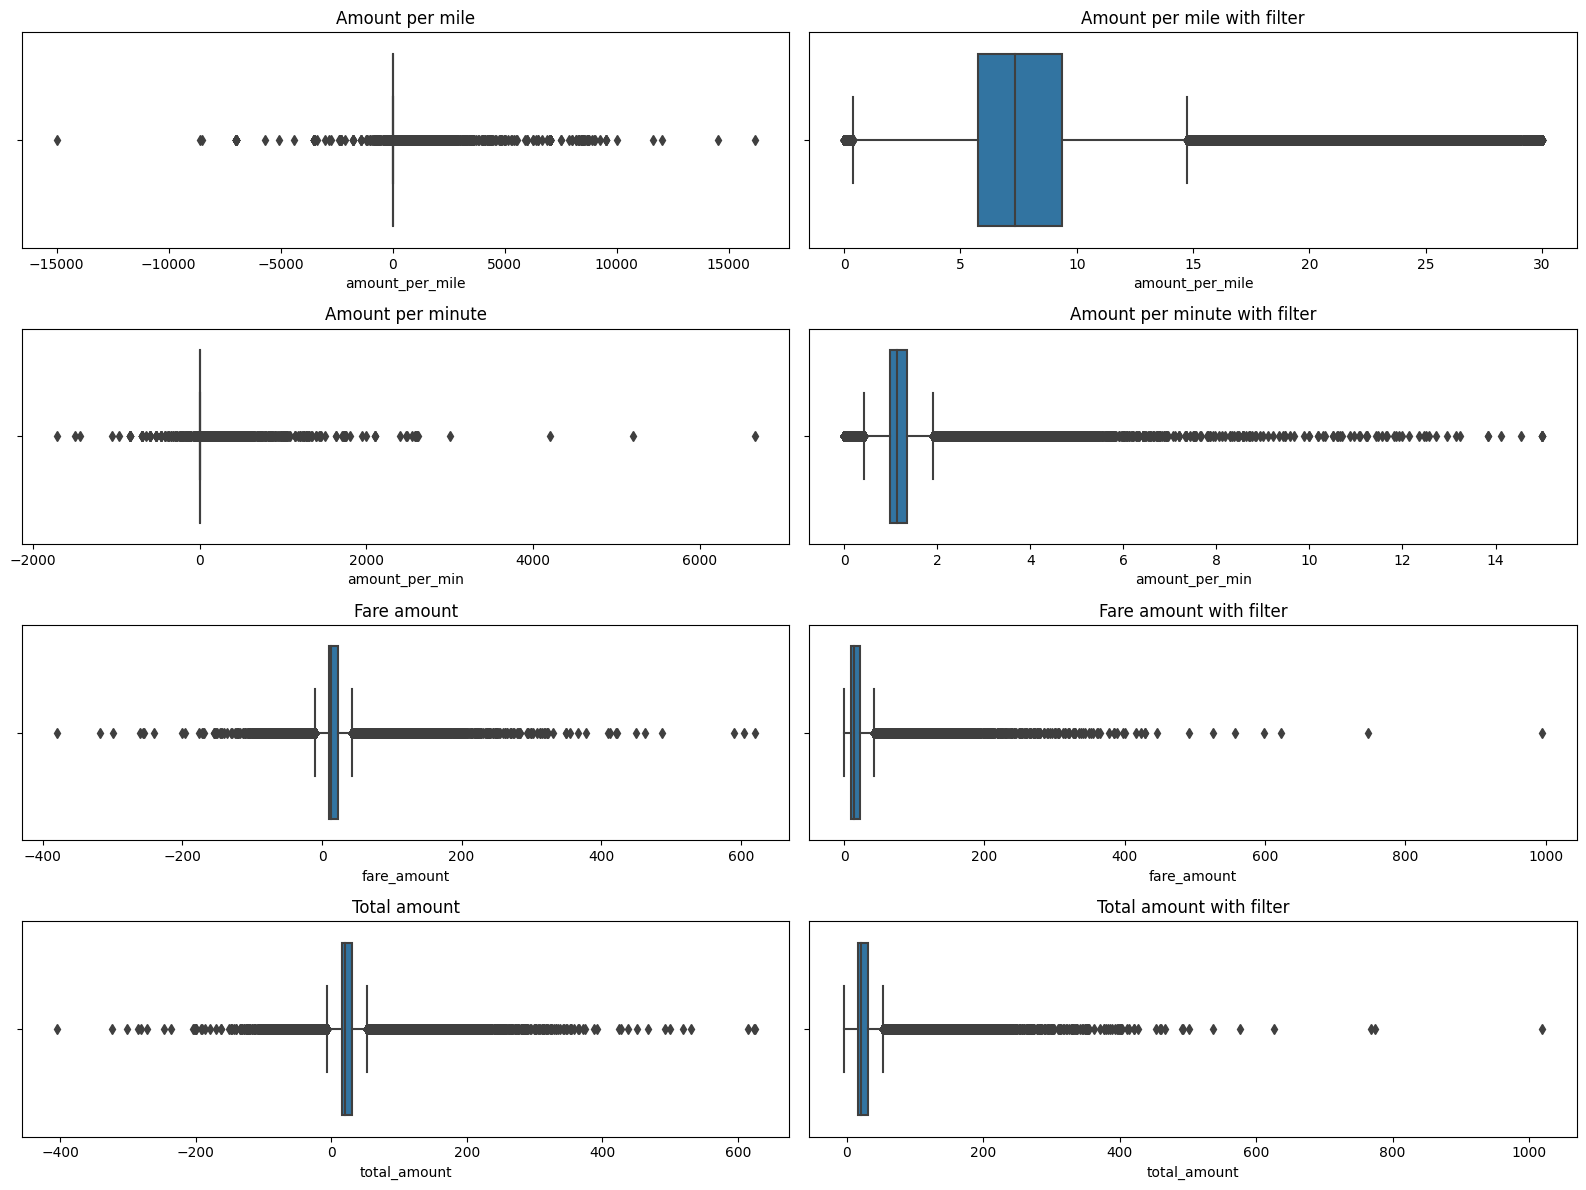

In [ ]:
# amount($) outliers

amount_per_min_mile_pd = df_yellow.select('amount_per_min','amount_per_mile', 'total_amount', 'fare_amount').dropna().sample(False, 0.01).toPandas() #we need to sample the data since is too large

# removes based on $ per mile
df_yellow_filter_a = df_yellow.filter(
    (col('amount_per_mile') <= 30) &   
    (col('amount_per_mile') >= 0)  
)

# removes based on $ per minute
df_yellow_filter_a = df_yellow_filter_a.filter(
    (col('amount_per_min') <= 15) &   
    (col('amount_per_min') >= 0)  
)

                 
amount_per_min_mile_pd_th = df_yellow_filter_a.select('amount_per_min','amount_per_mile', 'total_amount', 'fare_amount').dropna().sample(False, 0.01).toPandas()

fig, ax = plt.subplots(4, 2, figsize=(16, 12))

sns.boxplot(x=amount_per_min_mile_pd['amount_per_mile'], ax = ax[0][0])
ax[0][0].set_title('Amount per mile')

sns.boxplot(x=amount_per_min_mile_pd_th['amount_per_mile'], ax = ax[0][1])
ax[0][1].set_title('Amount per mile with filter')

sns.boxplot(x=amount_per_min_mile_pd['amount_per_min'], ax = ax[1][0])
ax[1][0].set_title('Amount per minute')

sns.boxplot(x=amount_per_min_mile_pd_th['amount_per_min'], ax = ax[1][1])
ax[1][1].set_title('Amount per minute with filter')

sns.boxplot(x=amount_per_min_mile_pd['fare_amount'], ax = ax[2][0])
ax[2][0].set_title('Fare amount')

sns.boxplot(x=amount_per_min_mile_pd_th['fare_amount'], ax = ax[2][1])
ax[2][1].set_title('Fare amount with filter')

sns.boxplot(x=amount_per_min_mile_pd['total_amount'], ax = ax[3][0])
ax[3][0].set_title('Total amount')

sns.boxplot(x=amount_per_min_mile_pd_th['total_amount'], ax = ax[3][1])
ax[3][1].set_title('Total amount with filter')

plt.tight_layout()
plt.show()

1) We can see that the total amount not always matches with the sum of the fares. Therefore we'll recalculate it
2) There're some years that shoudn't be logged to this file. For example, this file is from 2024 but there're data from 2009 or 2026. In this case, we'll change it to the year of the file
3) In a few cases the dropoff timestamp is earlier than pickup. In this cases, we'll make them equal 
4) We stablished some threholds to identify quick trips that had a long distance, or long trips with a short distance. We'll flag that as outliers 
5) Similarly, we'll flag too expensive trips based on $ per mile and per minute

# Code snippet for data cleaning - to be applied in the pipeline

In [ ]:
# substituir passanger count zero ou nullo por 1 ✔
# remover os dois datapoints do reversal (positivo e negativo)
# depois, remover os negativos
# remover os duplicados. Considerar o com maior total_amount, depois maior trip_distance
# nao remover payment_type == 4 (dispute). Remover na golder layer
# remover linhas que total amount (corrijida) E trip distace == zero
# substituir linhas de timestamp com dados errados daquele ano (exemplo, se file for de 2024, mudar de 2006 para 2024).
# substituir RecordID null por 99. Mapear RecordID usando os significados do dicionario (ex: 2 = JFK)
# substituir store_and_fwd_flag null por N
# substituir payment_type null por 5. Mapear usando os significados do dicionario
# nao substituir preços e distance null por 0 (deixar claro que é unkown e que outliers foram removidos)
# recalcular a coluna de total amount
# substituir datetime null pelo primeiro dia e horario daquele ano-mes (ex: 202412 --> 2024-12-01 00:00:00)
# quando dropoff for antes de pickup, fazer o dropoff igual ao pickup 
# criar a coluna trip_duration_min (criar dps de arruma o de cima)
# substituir colunas com trip distance maior que 1.5 ou negativo por zero
# ou ao inves de zerar, eu colocou um distance/fare/duration outlier flag. Ai da para filtrar no gold layer
# join com location para trazer o bairro
# reodenar colunas

In [5]:
df_yellow.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- file_year: string (nullable = false)
 |-- file_month: string (nullable = false)



In [4]:
# add file year and month columns 

# Add filename column
df_yellow = df_yellow.withColumn("source_file", input_file_name())

# Extract year and month from filename using regex
df_yellow = df_yellow.withColumn("file_year", regexp_extract("source_file", r"yellow_tripdata_(\d{4})-(\d{2})", 1))
df_yellow = df_yellow.withColumn("file_month", regexp_extract("source_file", r"yellow_tripdata_(\d{4})-(\d{2})", 2))

df_yellow = df_yellow.drop("source_file")

In [ ]:
# replace null and 0 passenger_count with 1
df_yellow = df_yellow.withColumn(
               'passenger_count',
               when((col('passenger_count').isNull()) | (col('passenger_count') == 0), 1)
               .otherwise(col('passenger_count'))
)

In [ ]:
# removes both rows when there's a reversal

# finds both reversal rows
# count = 2 and sum == 0 (e.g. 10 + (-10) = 0 -- -10 is the reversal of 10)
df_yellow_reversal = df_yellow\
            .groupBy('VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID','DOLocationID','trip_distance')\
            .agg(
                F.sum('total_amount').alias('total_amount_sum'),
                F.count('*').alias('count'))\
            .filter((col('total_amount_sum') == 0) & (col('count') == 2))
           
# antijoin removes from df_yellow everything that's df_reversal           
df_yellow = df_yellow.join(
                df_yellow_reversal.select('VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID','DOLocationID','trip_distance'),
                on = ['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID','DOLocationID','trip_distance'],
                how = 'anti'  
)

In [27]:
# na hora de fazer o upload para silver, fazer com partition keys que vai ser util
# Try to keep 100MB+ per partition file.
# year, month e talvez mais algum